In [36]:
from tensorflow.keras.datasets import cifar10

In [37]:
# train, test 데이터 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [38]:
# shape 확인

In [39]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [40]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [41]:
class_names[train_labels[0][0]]

'frog'

In [42]:
# 정규화 255

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [43]:
import matplotlib.pyplot as plt

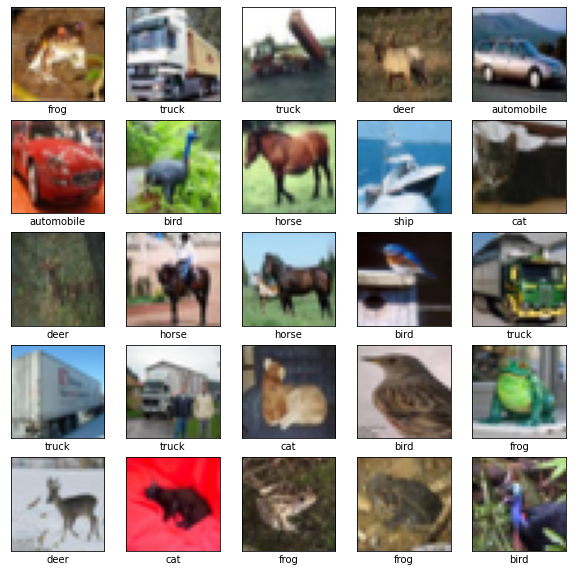

In [44]:
plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)

  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [45]:
# labels 들을 to categorical 이용해 원핫 인코딩 

In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [48]:
test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [49]:
from tensorflow.keras import models, layers, regularizers

# 모델 설계
# conv2d, MaxPooling 


# classfier 

In [50]:
model = models.Sequential([
  # feature extraction
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D(2),

  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D(2),

  layers.Flatten(),

  layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.Dropout(0.5),
  layers.Dense(10, activation='softmax')
])

In [51]:
# compile
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
# fit
history = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
625/625 [==============================] - 3s 5ms/step - loss: 1.8728 - accuracy: 0.3324 - val_loss: 1.4732 - val_accuracy: 0.5127
Epoch 2/30
625/625 [==============================] - 3s 4ms/step - loss: 1.5461 - accuracy: 0.4741 - val_loss: 1.3846 - val_accuracy: 0.5397
Epoch 3/30
625/625 [==============================] - 3s 4ms/step - loss: 1.4228 - accuracy: 0.5279 - val_loss: 1.2327 - val_accuracy: 0.5991
Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 1.3414 - accuracy: 0.5629 - val_loss: 1.2354 - val_accuracy: 0.5916
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 1.2936 - accuracy: 0.5854 - val_loss: 1.1808 - val_accuracy: 0.6227
Epoch 6/30
625/625 [==============================] - 3s 4ms/step - loss: 1.2476 - accuracy: 0.6037 - val_loss: 1.2578 - val_accuracy: 0.5951
Epoch 7/30
625/625 [==============================] - 3s 4ms/step - loss: 1.2177 - accuracy: 0.6169 - val_loss: 1.1286 - val_accuracy: 0.6451
Epoch 

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

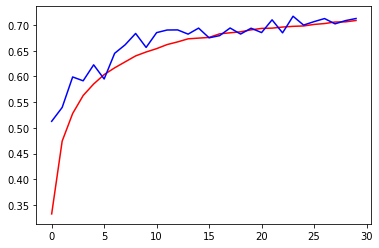

In [54]:
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')

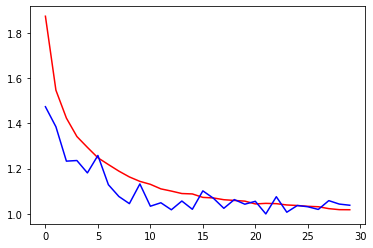

In [55]:
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')

In [56]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.0433 - accuracy: 0.7143


[1.0432636737823486, 0.7142999768257141]

In [61]:
prediction = model.predict(test_images[0].reshape([1, 32, 32, 3]))

In [62]:
prediction

array([[1.9691994e-04, 3.8494063e-06, 2.2407987e-03, 8.7116194e-01,
        2.4207930e-05, 1.2403385e-01, 2.3506794e-04, 8.5668704e-05,
        2.0083766e-03, 9.3010358e-06]], dtype=float32)

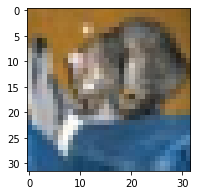

In [63]:
plt.figure(figsize=(3, 3))
plt.imshow(test_images[0])
plt.grid(False)

In [64]:
import numpy as np
print(class_names[np.argmax(prediction)])

cat
